# Exploratory Data Analysis On 1.2M Spotify Songs

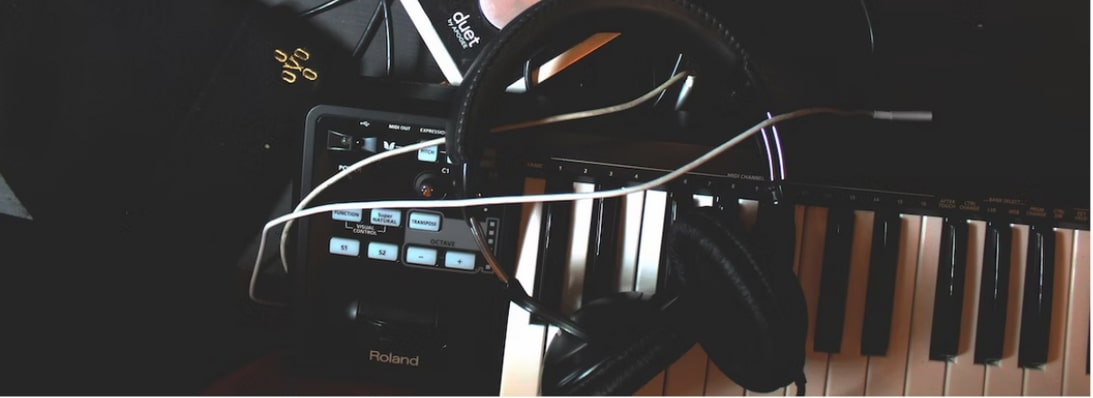

**Introduction to EDA**

Exploratory Data Analysis aka 'EDA' refers to the process of analyzing and summarizing data sets to get insights that can help in understanding the underlying patterns, relationships, and trends in the data. The primary goal of EDA is to identify and summarize the key characteristics of the data, including its distribution, central tendency, variability, and outliers.

**About the Project**

In this project, I have picked up a dataset from Kaggle which contains audio features for over 1.2 million songs, obtained with the Spotify API. In this exploratory data analysis project, we will dive deep into a dataset related to songs. We will explore various aspects of songs, such as their duration, tempo, release dates, danceability, and more. I will also investigate the relationship between these song features.

I will use Python and various data analysis libraries like Pandas, Matplotlib, Numpy, and Seaborn to visualize and analyze the data. The insights we uncover from this analysis could be useful for musicians, music producers, and streaming services to better understand their audience and create music that is more appealing and enjoyable to their listeners.

**Note**: Kindly run the code on Google Collab. 

## 1. Downloading the data.

1. Install opendataset to download data from Kaggle. 
2. Keep the dataset URL, username and kaggle key handy. 
3. Importing all the necesaary libraries for the project i.e. Numpy, Pandas, Matplotlib, seaborn, etc. 


In [1]:
!pip install opendatasets --upgrade --quiet

import opendatasets as od

dataset_url = 'https://www.kaggle.com/datasets/rodolfofigueroa/spotify-12m-songs'

od.download(dataset_url) 

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sarthaksrivastava123
Your Kaggle Key: ··········


100%|██████████| 97.4M/97.4M [00:05<00:00, 20.1MB/s]


### Importing the required libraries. 

Links for the official documentations:

Numpy: https://numpy.org/doc/

Pandas: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html

Seaborn: https://seaborn.pydata.org/generated/seaborn.scatterplot.html

Matplotlib: https://matplotlib.org/stable/index.html

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Glossary

The following list contains few technical terms and definitions which will be used throughout the project. 

1. Acousticness: Confidence measure of whether a track is acoustic. 

2. Danceability: How suitable a track is for dancing.

3. Energy: How intense and active a track is.

4. Instrumentalness: Proportion of instrumental parts in a track.

5. Loudness: Overall loudness of the track, in decibels (dB).

6. Liveness: Detects live audience in a track. Represents the probability that a track was performed live.

7. Mode: Whether the track is in major mode (1) or minor (0).

8. Speechiness: Proportion of spoken words in the track.

9. Tempo: Overall tempo of a track, in beats per minute (BPM).

10. Valence: Measures how positive a track sounds, from 1 (extremely positive) to 0 (extremely negative).


## 2. Data Preparation and Cleaning

1. By using Pandas load the dataset.
2. Take first look at data.
3. Try to idnetify missing or incorect values. 

In [3]:
# Setting file Path
data_filename = '/content/spotify-12m-songs/tracks_features.csv'

# Loading the Dataset

df = pd.read_csv(data_filename)

#Taking a look!

df

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
0,7lmeHLHBe4nmXzuXc0HDjk,Testify,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],1,1,False,0.470,...,0.0727,0.02610,0.000011,0.3560,0.503,117.906,210133,4.0,1999,1999-11-02
1,1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],2,1,True,0.599,...,0.1880,0.01290,0.000071,0.1550,0.489,103.680,206200,4.0,1999,1999-11-02
2,1hR0fIFK2qRG3f3RF70pb7,Calm Like a Bomb,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],3,1,False,0.315,...,0.4830,0.02340,0.000002,0.1220,0.370,149.749,298893,4.0,1999,1999-11-02
3,2lbASgTSoDO7MTuLAXlTW0,Mic Check,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],4,1,True,0.440,...,0.2370,0.16300,0.000004,0.1210,0.574,96.752,213640,4.0,1999,1999-11-02
4,1MQTmpYOZ6fcMQc56Hdo7T,Sleep Now In the Fire,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],5,1,False,0.426,...,0.0701,0.00162,0.105000,0.0789,0.539,127.059,205600,4.0,1999,1999-11-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204020,0EsMifwUmMfJZxzoMPXJKZ,Gospel of Juke,Notch - EP,38O5Ys0W9PFS5K7dMb7yKb,['FVLCRVM'],['7AjItKsRnEYRSiBt2OxK1y'],2,1,False,0.264,...,0.0672,0.00935,0.002240,0.3370,0.415,159.586,276213,4.0,2014,2014-01-09
1204021,2WSc2TB1CSJgGE0PEzVeiu,Prism Visions,Notch - EP,38O5Ys0W9PFS5K7dMb7yKb,['FVLCRVM'],['7AjItKsRnEYRSiBt2OxK1y'],3,1,False,0.796,...,0.0883,0.10400,0.644000,0.0749,0.781,121.980,363179,4.0,2014,2014-01-09
1204022,6iProIgUe3ETpO6UT0v5Hg,Tokyo 360,Notch - EP,38O5Ys0W9PFS5K7dMb7yKb,['FVLCRVM'],['7AjItKsRnEYRSiBt2OxK1y'],4,1,False,0.785,...,0.0564,0.03040,0.918000,0.0664,0.467,121.996,385335,4.0,2014,2014-01-09
1204023,37B4SXC8uoBsUyKCWnhPfX,Yummy!,Notch - EP,38O5Ys0W9PFS5K7dMb7yKb,['FVLCRVM'],['7AjItKsRnEYRSiBt2OxK1y'],5,1,False,0.665,...,0.0409,0.00007,0.776000,0.1170,0.227,124.986,324455,4.0,2014,2014-01-09


In [4]:
# Summarzing the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1204025 entries, 0 to 1204024
Data columns (total 24 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   id                1204025 non-null  object 
 1   name              1204025 non-null  object 
 2   album             1204025 non-null  object 
 3   album_id          1204025 non-null  object 
 4   artists           1204025 non-null  object 
 5   artist_ids        1204025 non-null  object 
 6   track_number      1204025 non-null  int64  
 7   disc_number       1204025 non-null  int64  
 8   explicit          1204025 non-null  bool   
 9   danceability      1204025 non-null  float64
 10  energy            1204025 non-null  float64
 11  key               1204025 non-null  int64  
 12  loudness          1204025 non-null  float64
 13  mode              1204025 non-null  int64  
 14  speechiness       1204025 non-null  float64
 15  acousticness      1204025 non-null  float64
 16  

In [5]:
#Find missing Values

df.isna().sum()

#Luckily we do not have any missing values in our datset.

id                  0
name                0
album               0
album_id            0
artists             0
artist_ids          0
track_number        0
disc_number         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
year                0
release_date        0
dtype: int64

In [6]:
# Parsing the release date column into a datetime columns which can be useful in further analysis. 
df.release_date = pd.to_datetime(df.release_date, errors = 'coerce')

In [7]:
numerical_cols = list(df.describe().columns)
print(numerical_cols)

['track_number', 'disc_number', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature', 'year']


## 3. Exploratory Analysis

In [8]:
# Analysing some important statistics for every column. 

df.describe()

,track_number,disc_number,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year
count,1.204025e+06,1.204025e+06,1.204025e+06,1.204025e+06,1.204025e+06,1.204025e+06,1.204025e+06,1.204025e+06,1.204025e+06,1.204025e+06,1.204025e+06,1.204025e+06,1.204025e+06,1.204025e+06,1.204025e+06,1.204025e+06
mean,7.656352e+00,1.055906e+00,4.930565e-01,5.095363e-01,5.194151e+00,-1.180870e+01,6.714595e-01,8.438219e-02,4.467511e-01,2.828605e-01,2.015994e-01,4.279866e-01,1.176344e+02,2.488399e+05,3.832494e+00,2.007328e+03
std,5.994977e+00,2.953752e-01,1.896694e-01,2.946839e-01,3.536731e+00,6.982132e+00,4.696827e-01,1.159914e-01,3.852014e-01,3.762844e-01,1.804591e-01,2.704846e-01,3.093705e+01,1.622104e+05,5.611826e-01,1.210117e+01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-6.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+03,0.000000e+00,0.000000e+00
25%,3.000000e+00,1.000000e+00,3.560000e-01,2.520000e-01,2.000000e+00,-1.525400e+01,0.000000e+00,3.510000e-02,3.760000e-02,7.600000e-06,9.680000e-02,1.910000e-01,9.405400e+01,1.740900e+05,4.000000e+00,2.002000e+03
50%,7.000000e+00,1.000000e+00,5.010000e-01,5.240000e-01,5.000000e+00,-9.791000e+00,1.000000e+00,4.460000e-02,3.890000e-01,8.080000e-03,1.250000e-01,4.030000e-01,1.167260e+02,2.243390e+05,4.000000e+00,2.009000e+03
75%,1.000000e+01,1.000000e+00,6.330000e-01,7.660000e-01,8.000000e+00,-6.717000e+00,1.000000e+00,7.230000e-02,8.610000e-01,7.190000e-01,2.450000e-01,6.440000e-01,1.370460e+02,2.858400e+05,4.000000e+00,2.015000e+03
max,5.000000e+01,1.300000e+01,1.000000e+00,1.000000e+00,1.100000e+01,7.234000e+00,1.000000e+00,9.690000e-01,9.960000e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.489340e+02,6.061090e+06,5.000000e+00,2.020000e+03


In [9]:
# Taking a look at some random rows of the data. 
df.sample(n=5)

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
778359,3k8mmD65FFpr2aSfnhO4lH,Illumination,Illumination,6QmLgZ4jZTbGolYwLXsgep,['Amir Beso'],['4VzWa6sDpM2YtdyCmcTR7d'],6,1,False,0.597,...,0.0417,0.866000,0.953000,0.109,0.679,144.998,204133,1.0,2010,2010-06-21
798496,3XY4DhhUBOaCDCs0VyXJh6,Where Ya At?,Oregon Failure,5AQEneyzDnWc3R83DxnYW6,['Sleep Of Oldominion'],['5sUo05Bqem5IgTa9Z1G0fl'],1,1,False,0.333,...,0.2930,0.120000,0.000000,0.135,0.564,182.529,179008,4.0,2014,2014-04-15
1097357,4nuPbUKsVACKWdkPrd417t,Sung It All Away,I,0HomuogMIUfm4bJSv0EKW6,['Jonathan Ian'],['4ES7XzCUKGhlilBfBCDxNU'],17,1,False,0.372,...,0.0647,0.811000,0.000017,0.109,0.409,96.341,125480,4.0,2006,2006-08-22
533527,06EmVQm2gyp65zaewT33CI,"Escenas poeticas, Book 1: El angel de los clau...","Granados, E.: Piano Music, Vol. 5 - Escenas Po...",2JiiVSva7nnGapfb7lzl3q,"['Enrique Granados', 'Douglas Riva']","['2xmzOWZeQCDksIQcLcnRrT', '6FkKF2YH3tLi6dCfNF...",8,1,False,0.271,...,0.0451,0.993000,0.940000,0.125,0.178,116.260,156400,4.0,2001,2001-10-10
509251,6Piq1ZIX8P0EHTkire0lFq,Lucky Homes,Valentine Kid's Litter,6e8OpsSYlcSa7o17utpGbQ,['Dahlia Seed'],['7f8dPnH8FrcGvisl5wCpUE'],6,1,False,0.284,...,0.0818,0.000195,0.646000,0.246,0.476,121.508,169533,4.0,1997,1997-01-01


### Open-ended Exploratoray analysis and Visulaization. 

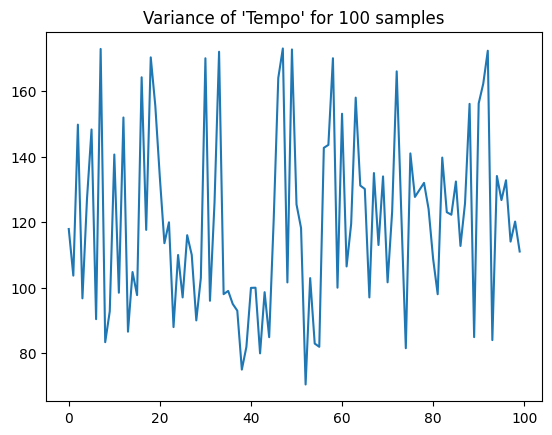

In [10]:
# Column: tempo 
plt.plot(df.tempo[:100]);
plt.title("Variance of 'Tempo' for 100 samples" );

As per the above graph, the tempo of a song can range from being as low as 60 bpm to going as high as 180 bpm. The tempo depends usually on the type of song, dance music/party songs tend to have a higher tempo whereas lower tempo is usually associated love songs or sad songs. 

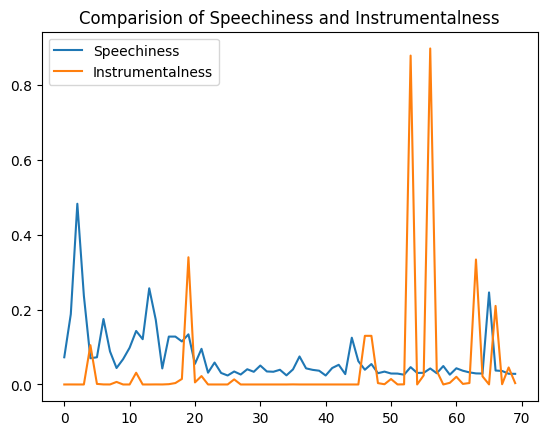

In [11]:
#Plotting Speechiness of song alongside with the Instrumentalness of the same. 

plt.plot(df.speechiness[:70], label='Speechiness');
plt.plot(df.instrumentalness[:70], label='Instrumentalness');
plt.title('Comparision of Speechiness and Instrumentalness');
plt.legend();

As per the above graph the speechiness (proportion of spoken words in the track) is significantly higher when instrumentalness (proportion of instrumental parts in a track) is low and vice-versa. It is also an expected result as the songs which tend to have less words would usually have long spans of only music and no singing. 


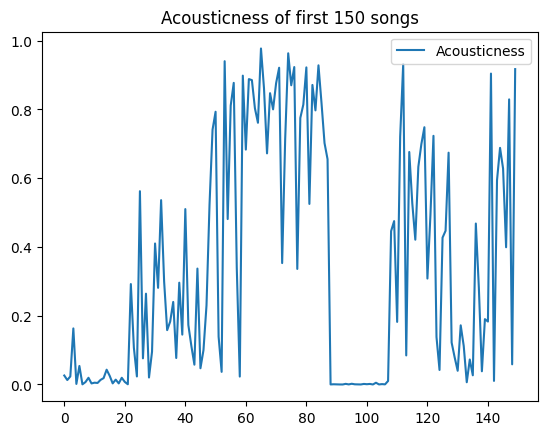

In [12]:
plt.plot(df.acousticness[:150], label='Acousticness');
plt.title('Acousticness of first 150 songs');
plt.legend();

Upon observering the sample, we see that a fair share of songs in the first 150 sample are acoustic. Acoustic music is more simplistic and quieter due to which it has it's own audience. In the next step, lets calculate the total percent of songs which are definelty acoustic, for this lets set the confidence level at 0.8 

In [13]:
print(df.value_counts(df.acousticness > 0.8))
print(f"The percent of Acoustic songs is {(358938/(845087 + 358938))} %")

acousticness
False    845087
True     358938
dtype: int64
The percent of Acoustic songs is 0.2981150723614543 %


Therefore, 358938 songs out of all the songs fall under acoustic category.

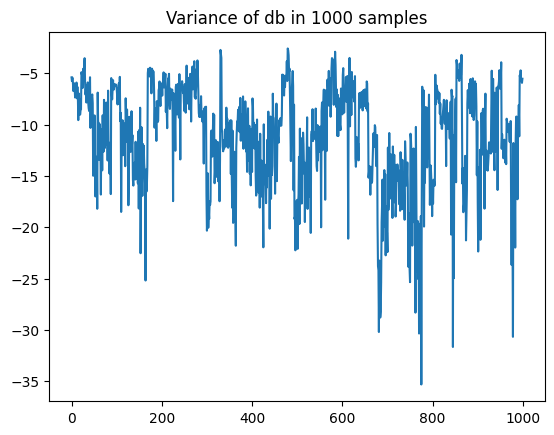

In [14]:
plt.plot(df.loudness[:1000], label='Loudness in db');
plt.title('Variance of db in 1000 samples');

Most songs are within the range of -20db and -10db. There are a few outliers on both ends as some songs can be extermely loud and some can be hard to hear if not recorded properly. 

## 4. Ask and Answer the questions.


### Q1: Find the top 10 artists with the maximum number of songs?

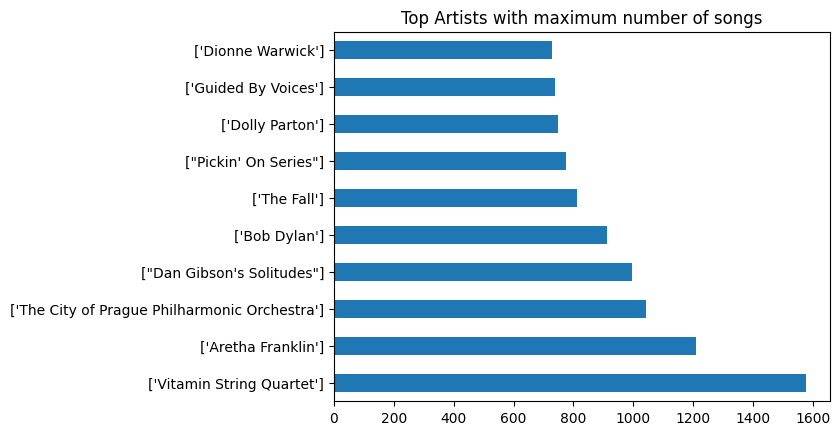

In [15]:
df.artists.value_counts()[1:11].plot(kind='barh', title='Top Artists with maximum number of songs');
# Using [1:11] as per the data maximun songs belong to other various artists which are expicitily mentioned. 


As per the graph, the maximun number of songs were sung by the band 'Vitamin String Quartet' followed by 'Aretha Franklin'

### Q2: Create a heatmap showing correlation among various features/variable ?

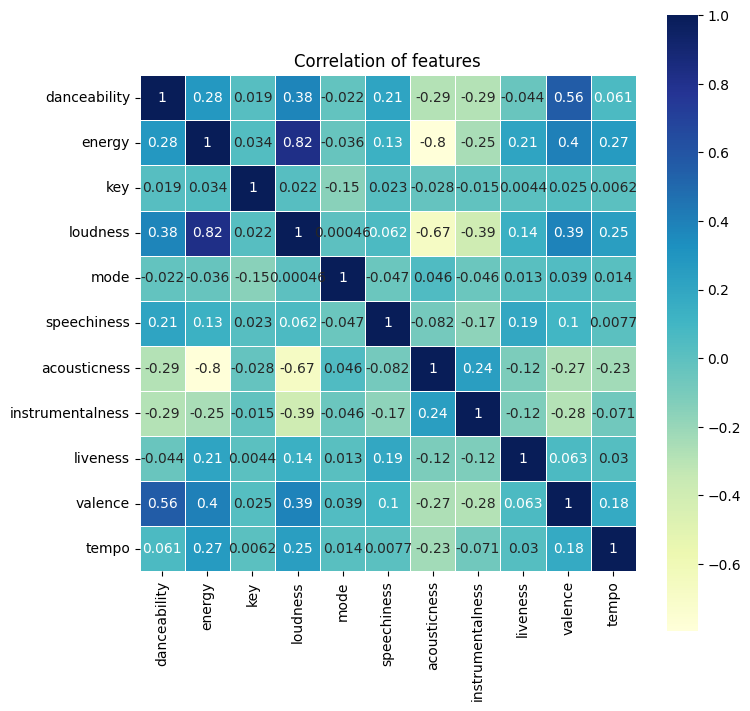

In [16]:
# Created a copy of the dataframe, to drop the columns which are not continuos variable and object type variables. 

newdf = df.copy()
newdf.drop(df.iloc[:, 0:9], inplace=True, axis=1)
newdf.drop(df.iloc[:, 20:24], inplace=True, axis=1)

corr = newdf.corr()

plt.figure(figsize=(8,8))
plt.title('Correlation of features')
sns.heatmap(corr, annot=True, linewidths=.5, cmap="YlGnBu",square=True);

Correlation is a statistical measure that expresses the extent to which two variables are linearly related. The above heatmap shows the correlation between the different variables of tha dataset. As evident, the 'loudness' and 'energy' are highly correlated.  

### Q3: Find the artist, which realeased maximum songs in a particular year from the Year 1900 to 2020?

In [17]:
artist = []
nor = []

#Finding the years for which data is present. 
years = df.release_date.dt.year.value_counts().keys().tolist()

for y in years:
  artist.append(df.artists[df.release_date.dt.year == y].value_counts().keys().tolist()[0])
  nor.append(df.artists[df.release_date.dt.year == y].value_counts()[0])

print('The maximun number of songs were released by: {}, in the year {}, with the total of {} songs'.format(artist[np.array(nor).argmax()], years[np.array(nor).argmax()], nor[np.array(nor).argmax()]))


The maximun number of songs were released by: ["Dan Gibson's Solitudes"], in the year 2013.0, with the total of 906 songs


### Q4: Is there any pattern in the release date of the songs, do artists prefer a particular time of the year?

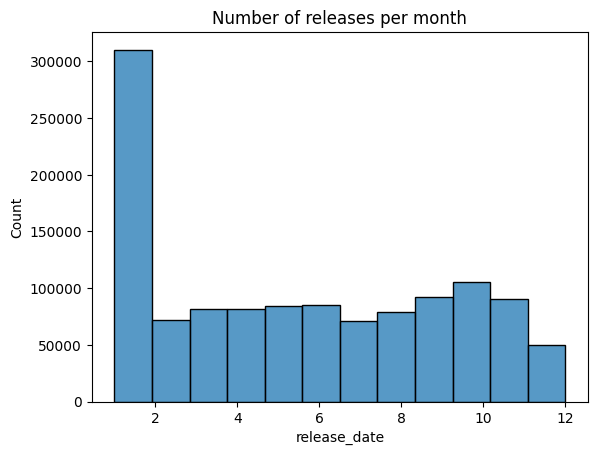

In [18]:
df.release_date.dt.month
sns.histplot(df.release_date.dt.month, bins=12).set(title='Number of releases per month');


As evident, most of the songs are relaeased in the month of January.. 

### Q5: What percentage of the total songs is 'explicit' ? (Containg foul language)

The percentage of explicit songs is 6.8643092959033245%.


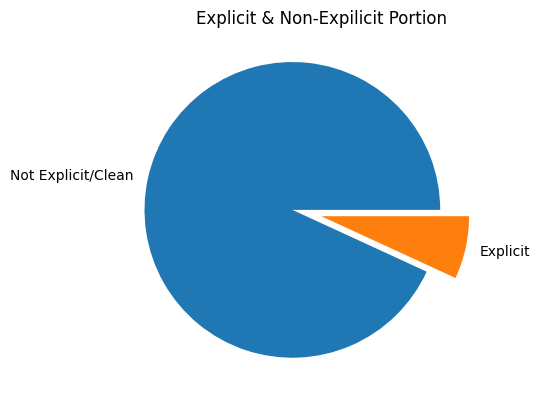

In [19]:
text = ['Not Explicit/Clean' , 'Explicit']
array = [df.explicit.value_counts()[0],df.explicit.value_counts()[1]]

plt.pie(array, labels=text, explode = [0.2,0]);
plt.title('Explicit & Non-Expilicit Portion');

print("The percentage of explicit songs is {}%.".format((array[1]/(array[1]+array[0]))*100))


### Q6: Compare the danceability of a song to the tempo(bpm). Does higher danceability always mean higher tempo?

Lets use line graph for the same. We have taken a sample of 150 rows, sorted them in ascending order of danceability and plotted the graph.

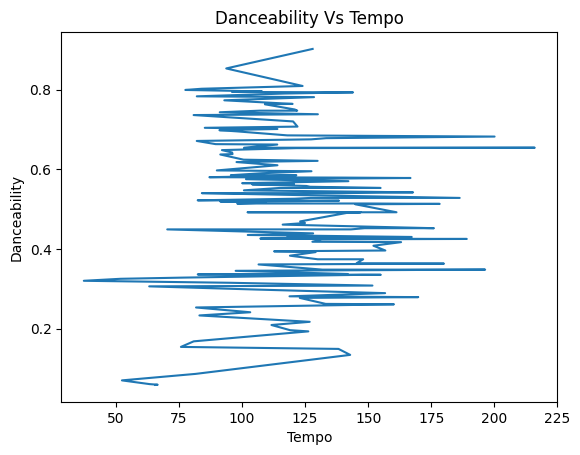

In [20]:
data = df.sample(n=150)

data = data.sort_values(by='danceability', ascending=True)

plt.plot(data.tempo, data.danceability);
plt.xlabel('Tempo')
plt.ylabel('Danceability')
plt.title('Danceability Vs Tempo');


We can conclude from the above graph the songs with a tempo of 100 - 120 bpm have higher danceability values i.e. if 100 beats are played per minute the resulting song will be appeal to the audience as a dance number. 

### Q7: Compare energy and danceability of the songs and look for any trends?

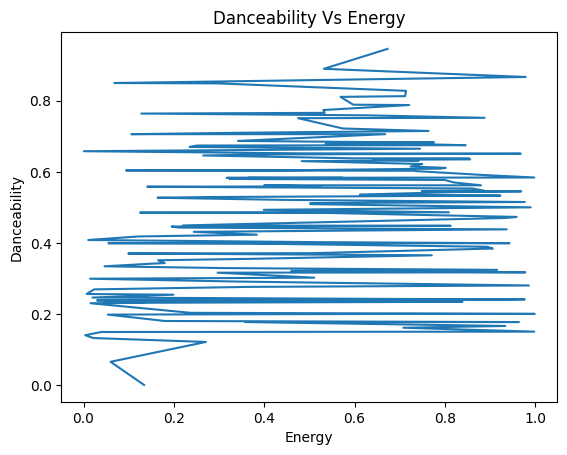

In [21]:
data = df.sample(n=150)

data = data.sort_values(by='danceability', ascending=True)

plt.plot( data.energy, data.danceability);
plt.xlabel('Energy');
plt.ylabel('Danceability');
plt.title('Danceability Vs Energy');



As established earlier, danceability and energy are highly correlated. The same is evident from the graph the slight right tilt in the graph depicts that as energy of a song increases the danceability also increases. 

### Q8: Find the key of the songs in major and minor mode. 

Major mode = 1 and Minor mode = 0 (Given as per the Kaggle dataset.)

'mode' is a pandas function as well, hence renaming the column to avoid any ambiguity. 

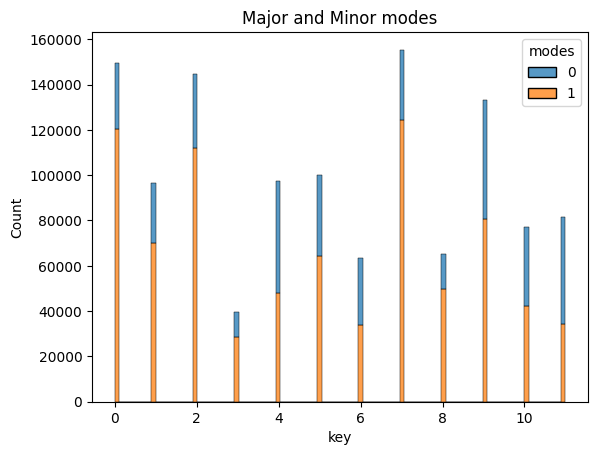

In [22]:
df.rename(columns = {'mode':'modes'}, inplace = True)


#Plotting graphs. 

sns.histplot(x=df.key, hue = df.modes, multiple="stack").set(title='Major and Minor modes');



As evident the songs are significantly lesser in the minor mode.

### Q9: Find the average duration of a song, and plot a graph depicting the same. 


The longest song is 877969    Bargrooves Deluxe Edition 2018 Mix 2 - Continu...
Name: name, dtype: object
The average value of playtime is 4.147331016036489 mins.


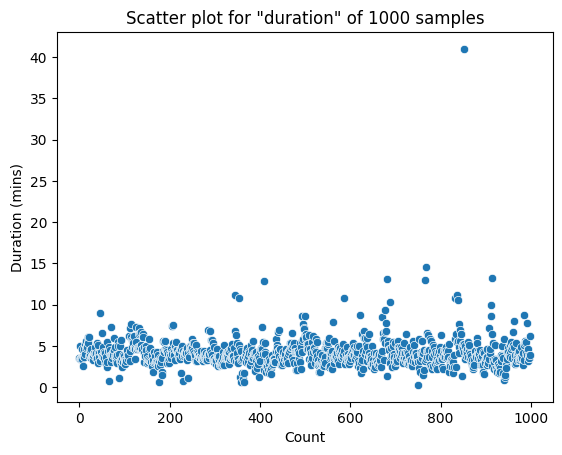

In [23]:
duration_mins = df.duration_ms/60000

sns.scatterplot(duration_mins[:1000]).set(title='Scatter plot for "duration" of 1000 samples', xlabel='Count', ylabel='Duration (mins)');

print('The longest song is {}'.format(df.sort_values(by = 'duration_ms', ascending=False)[:1].name))

print('The average value of playtime is {} mins.'.format(((df.duration_ms.mean())/60000)))

The average duration of a song in the given dataset is 4.14 mins.

### Q10: Valence measures how positive a track sounds, from 1 (extremely positive) to 0 (extremely negative), hence lets analyse the dataset for the same.

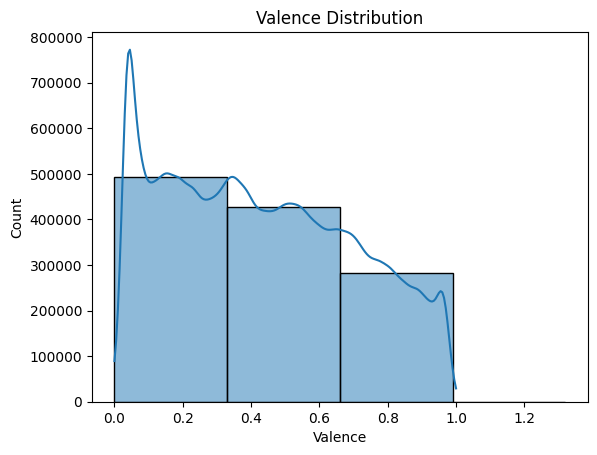

In [24]:
sns.histplot(df.valence, binwidth=0.33, kde=True).set( title='Valence Distribution', xlabel='Valence', ylabel='Count');

Most of the songs are extremely positive, followed by the neutral songs. 

## 5. Summary and Insights

On completing the analysis, I have drawn the following conclusions: 

- As per the dataset, the maximum number of songs are sung by the band 'Vitamin String Quartet' which is equal to 1577.

- The maximum number of songs were released by: Dan Gibson's Solitudes, in the year 2013., with a total of 906 songs.

- The features 'energy' and 'loudness' are highly correlated, whereas 'acousticness' and 'loudness' are negatively correlated.

- The number of songs released in January is significantly higher than other months. The reason for the same could be that artists want their songs to be on the music charts like Billboards throughout the year so that eventually they can win an award. 

- The percentage of explicit songs is 6.86%, i.e. these songs contain foul language or cuss words. 

- The higher tempo of the song doesn't always mean higher danceability, as per the plot, the most danceable songs are between the range of 80bpm to 120bpm. 

- The most danceable song has a medium level of energy, mostly around 0.5.

- Mostly the songs with the 0th key (C) are under the major mode, whereas the maximum songs under the minor key are with the 9th key

- The longest song of the dataset is 'Bargrooves Deluxe Edition 2018 Mix 2' which is 101 minutes long since it's a mixtape (a Compilation) while the average value of a song's duration is 4.14 minutes.

- As per the valence value most of the songs are extremely positive. 


Through this project, I have deduced some important highlights which will help others generate hypotheses for further analysis or any future projects such as:

- By adding a column that represents the song's ranking during the year it was released (for example: Billboards or MTV Hits) could result in more elaborate analysis of the dataset. 

- Utilizing this research for creating a song recommendation machine learning model. 

- Music Genre Classification model to predict the genre of a particular song. 

References:

- [Kaggle dataset discussions page](https://www.kaggle.com/datasets/rodolfofigueroa/spotify-12m-songs/discussion)
- [Towards Data Science blog](https://towardsdatascience.com/how-to-start-implementing-machine-learning-to-music-4bd2edccce1f)
- [Plotly documentation](https://plotly.com/python/)
- [Seaborn gallery](https://seaborn.pydata.org/examples/index.html)
- [Matplotlib tutorial](https://github.com/rougier/matplotlib-tutorial)

-Project by Sarthak Srivastava.